In [5]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


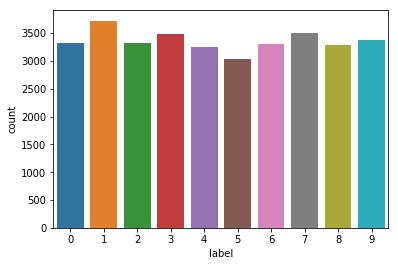

In [63]:
train = pd.read_csv('./input/train.csv')
test = pd.read_csv('./input/test.csv')

y = train['label']
train = train.drop(labels = ['label'],axis=1)
g = sns.countplot(y_train)
# y_train.value_counts()
train.head()

In [44]:
# check for null/missing values
# train.isnull().any().describe()

In [45]:
# test.isnull().any().describe()

In [64]:
# no missing values, so let's go to the next step
# Since CNN converges faster on[0,1] than [0,255], I will do a grayscale normalization.

train = train/255.0
test = test/255.0

# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
#    - Train and test images (28px x 28px) has been stock into pandas. Dataframe has 1D vectors of 784 values. 
#    - We reshape all data to 28x28x1 3D matrices.
# Keras requires an extra dimension in the end which correspond to channels. 
#     - MNIST images are gray scaled so it use only 1 channel. 
#     - For RGB images, there are 3 channels, we would have reshaped 784px vectors to 28x28x3 3D matrices.

train = train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(train,y,test_size = 0.2, random_state =0)

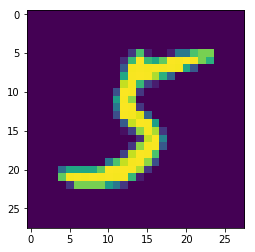

In [68]:
# one example
g = plt.imshow(X_train[30000][:,:,0])  # len(X_train) = 33600

3. CNN
3.1 Define the model

I used the Keras Sequential API, where you have just to add one layer at a time, starting from the input.

- The first is the convolutional (Conv2D) layer, which has a set of learnable filters. 
    - I choosed to set 32 filters for the two first conv2D layers and 64 filters for the two last ones. 
    - Each filter transforms a part of the image (defined by the kernel size) using the kernel filter. 
    - The kernel filter matrix is applied on the whole image. Filters can be seen as a transformation of the image.

The CNN can isolate features that are useful everywhere from these transformed images (feature maps).

- The second important layer in CNN is the pooling (MaxPool2D) layer. This layer simply acts as a downsampling filter. It looks at the 2 neighboring pixels and picks the maximal value. These are used to reduce computational cost, and to some extent also reduce overfitting. We have to choose the pooling size (i.e the area size pooled each time).

- Dropout is a regularization method, where a proportion of nodes in the layer are randomly ignored (setting their wieghts to zero) for each training sample. This drops randomly a propotion of the network and forces the network to learn features in a distributed way. This technique also improves generalization and reduces the overfitting.

- 'relu' is the activation function max(0,x). The rectifier activation function is used to add non linearity to the network.

- The Flatten layer is use to convert the final feature maps into a one single 1D vector. This flattening step is needed so that you can make use of fully connected layers after some convolutional/maxpool layers. It combines all the found local features of the previous convolutional layers.

- In the end i used the features in two fully-connected (Dense) layers which is just artificial an neural networks (ANN) classifier. In the last layer(Dense(10,activation="softmax")) the net outputs distribution of probability of each class.

In [73]:
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

NameError: name 'Sequential' is not defined